## Preprocessing (without feature engineering)

### main (table 6)
https://www.transportation.gov/policy/aviation-policy/domestic-airline-consumer-airfare-report

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

# replace this line with your table_6 file path
main_path = "Consumer_Airfare_Report__Table_6_-_Contiguous_State_City-Pair_Markets_That_Average_At_Least_10_Passengers_Per_Day_20241007.csv"

In [2]:
main_data = pd.read_csv(main_path)

# drop irrelevant columns and rows with missing values
main_data.drop(columns=['tbl', 'table_1_flag', 'tbl6pk', 'Geocoded_City1', 'Geocoded_City2'], inplace=True)
main_data.dropna(inplace=True)
main_data.drop_duplicates(inplace=True)

main_data

C:\Users\Arial\AppData\Local\Temp\ipykernel_13496\4027604046.py:1: DtypeWarning: Columns (17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  main_data = pd.read_csv(main_path)


,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,2004,2,33851,34027,"Oklahoma City, OK","West Palm Beach/Palm Beach, FL",1197,11,242.51,DL,0.5100,235.98,DL,0.5100,235.98
1,2003,2,30693,34027,"Nashville, TN","West Palm Beach/Palm Beach, FL",758,138,136.00,WN,0.7300,126.54,WN,0.7300,126.54
2,2004,4,33029,33570,"Lincoln, NE","San Diego, CA",1259,19,193.88,UA,0.8400,194.65,NW,0.1300,176.53
3,2004,2,33198,30424,"Kansas City, MO","Wausau/Mosinee/Stevens Point, WI",459,13,199.57,NW,0.7000,201.34,UA,0.1300,195.58
4,2003,2,30135,30325,"Allentown/Bethlehem/Easton, PA","Denver, CO",1539,29,272.83,UA,0.3200,321.47,DL,0.1700,201.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
617300,2024,1,35412,34653,"Knoxville, TN","Tulsa, OK",666,12,345.54,AA,0.6514,313.37,AA,0.6514,313.37
617301,2024,1,35412,34761,"Knoxville, TN","Sanford, FL",511,230,94.29,G4,1.0000,94.29,G4,1.0000,94.29
617302,2024,1,35412,34783,"Knoxville, TN","Springfield, MO",532,14,318.97,AA,0.6270,263.64,AA,0.6270,263.64
617303,2024,1,35412,34986,"Knoxville, TN","Sarasota/Bradenton, FL",586,13,385.15,DL,0.5614,471.40,AA,0.3947,277.35


### percent change of fare & passenger from same quarter of previous year

In [3]:
def percent_change(df):
    df = df.sort_values(by=['citymarketid_1', 'citymarketid_2', 'quarter', 'Year'])

    fare_previous_year = df.groupby(['citymarketid_1', 'citymarketid_2', 'quarter'])['fare'].shift(1)
    passenger_previous_year = df.groupby(['citymarketid_1', 'citymarketid_2', 'quarter'])['passengers'].shift(1)
    
    df['fare_proportion_change'] = ((df['fare'] - fare_previous_year) / fare_previous_year)
    df['passenger_proportion_change'] = (df['passengers'] - passenger_previous_year) / passenger_previous_year

    return df.dropna()

main_data = percent_change(main_data)
main_data

,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,fare_proportion_change,passenger_proportion_change
349931,1997,1,30135,30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,34,326.12,US,0.4100,344.92,DL,0.2400,307.54,0.216185,-0.150000
366881,1998,1,30135,30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,40,318.51,US,0.4300,316.90,US,0.4300,316.90,-0.023335,0.176471
242033,1999,1,30135,30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,39,312.45,US,0.4100,302.36,US,0.4100,302.36,-0.019026,-0.025000
360933,2000,1,30135,30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,38,343.93,US,0.3900,298.41,US,0.3900,298.41,0.100752,-0.025641
337203,2001,1,30135,30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,43,349.89,US,0.4100,337.44,US,0.4100,337.44,0.017329,0.131579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436681,2015,4,35550,30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,12,280.44,DL,1.0000,280.44,DL,1.0000,280.44,-0.092222,0.000000
421567,2016,4,35550,30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,14,282.57,DL,0.9766,281.54,DL,0.9766,281.54,0.007595,0.166667
490453,2017,4,35550,30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,13,323.00,DL,1.0000,323.00,DL,1.0000,323.00,0.143080,-0.071429
537707,2018,4,35550,30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,12,345.46,DL,0.9821,345.90,DL,0.9821,345.90,0.069536,-0.076923


### brent crude price
source: https://fred.stlouisfed.org/series/POILBREUSDQ

In [4]:
# replace the following line with your brent crude file path
brentcrude_path = "BrentCrude.csv"

In [5]:
brentcrude_data = pd.read_csv(brentcrude_path)

brentcrude_data['DATE'] = pd.to_datetime(brentcrude_data['DATE'])
brentcrude_data['Year'] = brentcrude_data['DATE'].dt.year
brentcrude_data['quarter'] = brentcrude_data['DATE'].dt.quarter

brentcrude_data = brentcrude_data.rename(columns={'POILBREUSDQ': 'brentcrude'})

brentcrude_data = brentcrude_data[['Year', 'quarter', 'brentcrude']]
brentcrude_data


,Year,quarter,brentcrude
0,1990,1,19.719180
1,1990,2,16.383437
2,1990,3,26.357078
3,1990,4,32.366761
4,1991,1,20.946396
...,...,...,...
133,2023,2,78.086130
134,2023,3,85.983547
135,2023,4,82.891681
136,2024,1,81.955714


In [6]:
main_data = pd.merge(main_data, brentcrude_data, how='left', on=['Year', 'quarter'])

main_data["route_id"] = main_data['citymarketid_1'].astype(str) + "_" + main_data['citymarketid_2'].astype(str)

main_data = main_data.rename(columns={'carrier_lg': 'carrier_lm', 'large_ms': 'ms_lm', 'fare_lg': 'fare_lm', 
                                      'carrier_low': 'carrier_lf', 'lf_ms': 'ms_lf', 'fare_low': 'fare_lf'})

### remove data before 2010

In [7]:
main_data = main_data[main_data['Year'] >= 2010]

### remove outliers of "passengers"

In [8]:
main_data = main_data[main_data['passengers'] <= main_data['passengers'].quantile(0.99)]

<Axes: xlabel='passengers', ylabel='fare'>

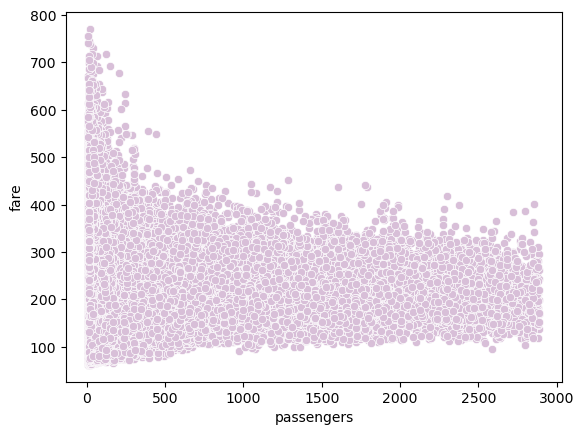

In [9]:
import seaborn as sns
sns.scatterplot(data=main_data, x='passengers', y='fare', color='#D8BFD8')

### define haul category

In [10]:
bins = [0, 900, 2200, float('inf')]
labels = ['short', 'medium', 'long']
main_data['haul_category'] = pd.cut(main_data['nsmiles'], bins=bins, labels=labels)

### add carrier category

In [11]:
carrier_category = {'full service': ['DL', 'AA', 'AS', 'UA', 'NW', 'US', 'CO'],
                    'lcc': ['FL', 'B6', 'VX', 'WN', 'YX', 'U5'],
                    'ultra lcc': ['MX', 'G4', 'XP', 'SY', 'NK', 'F9'],
                    'regional': ['3M', 'OO']}
carrier_mapping = {code: category for category, codes in carrier_category.items() for code in codes}

main_data['carrier_lm_category'] = main_data['carrier_lm'].map(carrier_mapping)
main_data['carrier_lf_category'] = main_data['carrier_lf'].map(carrier_mapping)

### add fare_diff_avg_lf, fare_diff_avg_lm

In [12]:
main_data["fare_diff_avg_lf"] = main_data['fare'] - main_data['fare_lf']
main_data["fare_diff_avg_lm"] = main_data['fare'] - main_data['fare_lm']

In [13]:
main_data = main_data[['Year', 'quarter', 'brentcrude', 'route_id', 'city1', 'city2', 'nsmiles', 'haul_category', 'passengers', 'passenger_proportion_change', 
                       'fare', 'fare_proportion_change', 'carrier_lm', 'carrier_lm_category', 'ms_lm', 'fare_diff_avg_lm', 'carrier_lf', 'carrier_lf_category', 'ms_lf', 'fare_diff_avg_lf']]
main_data.reset_index(inplace=True, drop=True)
main_data

,Year,quarter,brentcrude,route_id,city1,city2,nsmiles,haul_category,passengers,passenger_proportion_change,fare,fare_proportion_change,carrier_lm,carrier_lm_category,ms_lm,fare_diff_avg_lm,carrier_lf,carrier_lf_category,ms_lf,fare_diff_avg_lf
0,2010,1,76.674837,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,medium,28,0.037037,214.94,-0.091585,US,full service,0.4600,-8.85,DL,full service,0.2000,36.31
1,2011,1,105.369424,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1308,medium,48,0.714286,223.83,0.041360,US,full service,0.3200,-56.96,DL,full service,0.2000,56.70
2,2012,1,118.427965,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1307,medium,48,0.000000,236.32,0.055801,DL,full service,0.3500,22.44,DL,full service,0.3500,22.44
3,2013,1,112.867180,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1307,medium,18,-0.625000,335.14,0.418162,US,full service,0.4000,-30.34,DL,full service,0.3500,47.11
4,2014,1,108.211017,30135_30194,"Allentown/Bethlehem/Easton, PA","Dallas/Fort Worth, TX",1307,medium,27,0.500000,275.18,-0.178910,US,full service,0.5700,-10.20,DL,full service,0.2700,44.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309866,2015,4,44.175606,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,short,12,0.000000,280.44,-0.092222,DL,full service,1.0000,0.00,DL,full service,1.0000,0.00
309867,2016,4,51.126270,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,short,14,0.166667,282.57,0.007595,DL,full service,0.9766,1.03,DL,full service,0.9766,1.03
309868,2017,4,61.479004,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,short,13,-0.071429,323.00,0.143080,DL,full service,1.0000,0.00,DL,full service,1.0000,0.00
309869,2018,4,68.320070,35550_30852,"Valdosta, GA","Washington, DC (Metropolitan Area)",689,short,12,-0.076923,345.46,0.069536,DL,full service,0.9821,-0.44,DL,full service,0.9821,-0.44


### remove routes lacking complete data from 2010Q1 to 2024Q1

In [14]:
route_counts = main_data['route_id'].value_counts()
valid_routes = route_counts[route_counts == max(route_counts)].index
main_data = main_data[main_data['route_id'].isin(valid_routes)]

In [17]:
pd.crosstab(index = main_data['route_id'], columns = 'counts').sort_values(by='counts')

col_0,counts
route_id,
30135_30977,57
31871_34614,57
31871_34100,57
31871_34057,57
31871_33214,57
...,...
30713_34492,57
30713_34057,57
30713_33851,57


### export processed data

In [16]:
# main_data.to_csv('data_processed.csv', index=False)